### Filtering CASTables by filename or image_id

In [1]:
import swat as sw
from swat.cas.table import CASTable
from dlpy.utils import filter_by_filename, filter_by_image_id
from dlpy.utils import show_images
from dlpy.splitting import two_way_split, three_way_split


#### Start CAS Server

In [2]:
s = sw.CAS(cashost, casport)

#### Load Dataset

In [3]:
model_path='/path/to/dataset'
train_set_name = "SGF_DetYolosgf416_0317_PLA.sashdat"
s.table.addcaslib(activeonadd=False,datasource={'srctype':'path'},
                  name='dnfs',path=model_path,subdirectories=True)
s.setsessopt(caslib='dnfs')
s.table.loadtable(casout={'name':'train_set', 'replace':True, 'blocksize':350},
                  caslib='dnfs',path=train_set_name# , where=whereStr
                 )


NOTE: Cloud Analytic Services added the caslib 'dnfs'.
NOTE: 'dnfs' is now the active caslib.
NOTE: Cloud Analytic Services made the file SGF_DetYolosgf416_0317_PLA.sashdat available as table TRAIN_SET in caslib dnfs.


[caslib]

 'dnfs'

[tableName]

 'TRAIN_SET'

[casTable]

 CASTable('TRAIN_SET', caslib='dnfs')

+ Elapsed: 0.00265s, user: 0.00107s, sys: 0.000207s, mem: 0.718mb

In [4]:
train_table = s.CASTable('train_set')

### Filtering by filename

In [5]:
# Return a filtered version of the original table
filtered = filter_by_filename(train_table, filename = 'image626')
print("Length of original table: ", len(train_table))
print("Length of filtered table: ", len(filtered))

Length of original table:  4454
Length of filtered table:  11


#### Filtering by filename does not have to be a unique filename
All instances where _path_ contains substring filename are returned 

In [6]:
filtered.head(len(filtered))

,imgNo,_image_,_size_,_path_,_type_,_id_,_label_,var0,im_path,_nObjects_,...,_Object1_,_Object1_x,_Object1_y,_Object1_width,_Object1_height,_Object2_,_Object2_x,_Object2_y,_Object2_width,_Object2_height
0,0307_image6260,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,58026,/dept/cas/weshiz/SGF/0317/0307_image6260.jpg,jpg,1625,,0,0307_image6260,3.0,...,PLA,0.260156,0.416146,0.096875,0.201042,PLA,0.731641,0.453125,0.066406,0.183333
1,0307_image6261,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,53925,/dept/cas/weshiz/SGF/0317/0307_image6261.jpg,jpg,1627,,0,0307_image6261,2.0,...,PLA,0.545703,0.449479,0.058594,0.155208,,NaN,NaN,NaN,NaN
2,0307_image6262,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,57303,/dept/cas/weshiz/SGF/0317/0307_image6262.jpg,jpg,1629,,0,0307_image6262,3.0,...,PLA,0.321875,0.450000,0.079687,0.210417,PLA,0.746484,0.432812,0.100781,0.246875
3,0307_image6263,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,57797,/dept/cas/weshiz/SGF/0317/0307_image6263.jpg,jpg,1631,,0,0307_image6263,3.0,...,PLA,0.439453,0.453125,0.085156,0.204167,PLA,0.724609,0.523438,0.102344,0.267708
4,0307_image6264,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,57365,/dept/cas/weshiz/SGF/0317/0307_image6264.jpg,jpg,1633,,0,0307_image6264,3.0,...,PLA,0.797266,0.503125,0.069531,0.185417,PLA,0.236328,0.430208,0.069531,0.191667
5,0307_image6265,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,56591,/dept/cas/weshiz/SGF/0317/0307_image6265.jpg,jpg,1635,,0,0307_image6265,3.0,...,PLA,0.882422,0.515104,0.099219,0.226042,PLA,0.195703,0.435417,0.092969,0.189583
6,0307_image6266,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,56986,/dept/cas/weshiz/SGF/0317/0307_image6266.jpg,jpg,1638,,0,0307_image6266,3.0,...,PLA,0.881250,0.506771,0.100000,0.276042,PLA,0.185156,0.457292,0.082812,0.225000
7,0307_image6267,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,52464,/dept/cas/weshiz/SGF/0317/0307_image6267.jpg,jpg,1641,,0,0307_image6267,2.0,...,PLA,0.805859,0.452604,0.074219,0.146875,,NaN,NaN,NaN,NaN
8,0307_image6268,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,53990,/dept/cas/weshiz/SGF/0317/0307_image6268.jpg,jpg,1645,,0,0307_image6268,1.0,...,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
9,0307_image6269,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,57402,/dept/cas/weshiz/SGF/0317/0307_image6269.jpg,jpg,1647,,0,0307_image6269,3.0,...,PLA,0.299609,0.451042,0.080469,0.231250,PLA,0.726172,0.451042,0.116406,0.285417


Can also search for list of filenames

In [7]:
filtered = filter_by_filename(train_table, filename = ['image626', 'image625'])
print("Length of filtered table: ", len(filtered))

Length of filtered table:  22


If only a single element is desired we can pass a more complete path

In [9]:
filtered = filter_by_filename(train_table, filename = ['0307_image6267.jpg'])
print("Length of filtered table: ", len(filtered))

Length of filtered table:  1


We can display the images in the table using show_images

NOTE: Table JUST_FOR_SHOW contains compressed images.
NOTE: Cloud Analytic Services dropped table JUST_FOR_SHOW from caslib dnfs.


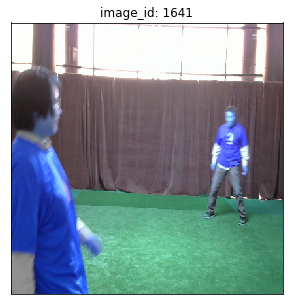

In [11]:
show_images(s, filtered, fig_size=(5,5))

### Filtering tables by _id_ column

In [13]:
by_ids = filter_by_image_id(train_table, image_id = [1641, 1642])

NOTE: Table JUST_FOR_SHOW contains compressed images.
NOTE: Cloud Analytic Services dropped table JUST_FOR_SHOW from caslib dnfs.


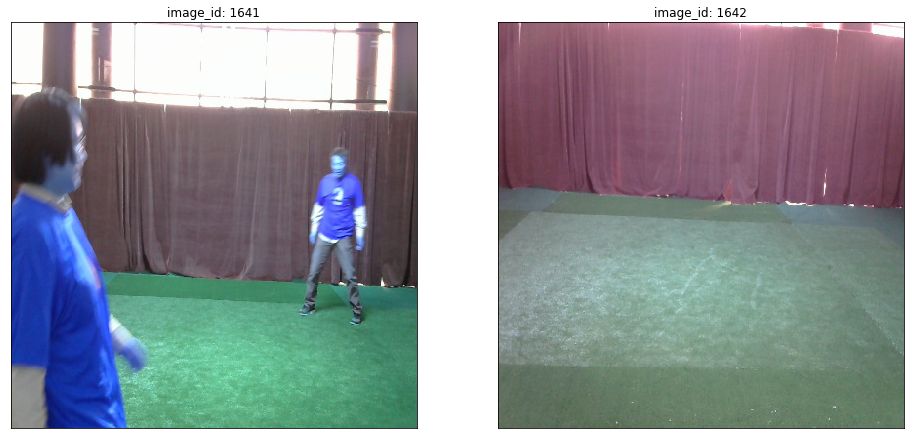

In [14]:
show_images(s, by_ids)

### Filtering inside the show_images function
We can pass a filename or image_id into the show_images function if we do not need the filtered table

NOTE: Cloud Analytic Services dropped table JUST_FOR_SHOW from caslib dnfs.
NOTE: Table FILTERED_MYA7JH contains compressed images.
NOTE: Cloud Analytic Services dropped table FILTERED_MYA7JH from caslib dnfs.


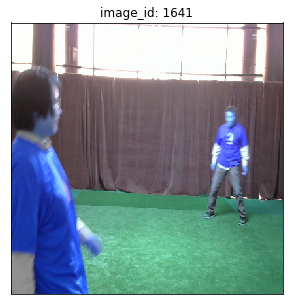

In [16]:
show_images(s, train_table, filename = ['0307_image6267.jpg'], fig_size=(5,5))

Likewise, we can use show_images based on image_id if we do not need a filtered table returned 

Filtering by id
NOTE: Cloud Analytic Services dropped table JUST_FOR_SHOW from caslib dnfs.
NOTE: Table FILTERED_ECCFIB contains compressed images.
NOTE: Cloud Analytic Services dropped table FILTERED_ECCFIB from caslib dnfs.


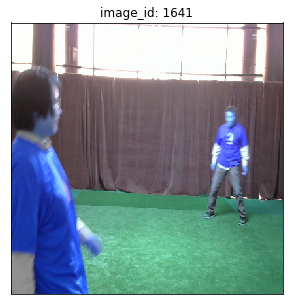

In [17]:
show_images(s, train_table, image_id = [1641], fig_size=(5,5))

In [18]:
s.endsession()

+ Elapsed: 0.000137s, sys: 0.000131s, mem: 0.194mb